<a href="https://colab.research.google.com/github/AIGeekProgrammer/MiscellaneousAI/blob/main/NLP/Bigram_classic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook: Bigram - classic<br>
Author: Szymon Manduk<br>
Date: Oct 22, 2022<br>
Description: Implementing classic Bigram algorithm using counting - based on the idea presented by A. Karpathy: https://youtu.be/VMj-3S1tku0<br>

In [ ]:
import torch

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Open a file with names, read names into list removing newline 
# and adding character '.' for the begining and end of a word.
words = []
with open('/gdrive/My Drive/Test/names.txt', 'r') as f:
  for cnt, line in enumerate(f.readlines()):
    words.append('.' + line.rstrip('\n') + '.')

In [ ]:
words[:10]

['.emma.',
 '.olivia.',
 '.ava.',
 '.isabella.',
 '.sophia.',
 '.charlotte.',
 '.mia.',
 '.amelia.',
 '.harper.',
 '.evelyn.']

In [ ]:
# Create a dictionary object to store number of pairs of 2 subsequent characters.
dictionary = {}
for w in words:
  for ch1, ch2 in zip(w, w[1:]):
    key = ch1+ch2
    if key in dictionary:
      dictionary[key] += 1
    else:
      dictionary[key] = 1

dict_list = list(dictionary.items())
dict_list[:5]

[('.e', 1531), ('em', 769), ('mm', 168), ('ma', 2590), ('a.', 6640)]

In [ ]:
# Look at few most frequent elements.
dict_list_sorted = sorted(dict_list, key=lambda tup: tup[1], reverse=True)
dict_list_sorted[:5]

[('n.', 6763), ('a.', 6640), ('an', 5438), ('.a', 4410), ('e.', 3983)]

In [ ]:
# Listing the first letters to build 2D matrix with frequencies for all two-letter words.
letters = sorted(list(set([x[0] for x, y in dict_list])))
letters

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
# Create an empty 2d matrix to store numbers of occurances
matrix = torch.zeros((len(letters), len(letters)), dtype=torch.int16, requires_grad=False)
matrix[:5]

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]], dtype=torch.int16)

In [ ]:
# Filling the matrix with numbers of occurances
for x, letter_x in enumerate(letters):
  for y, letter_y in enumerate(letters):
    matrix[x, y] = dictionary.get(letter_x+letter_y, 0)
matrix[0:100][0:2]

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435]], dtype=torch.int16)

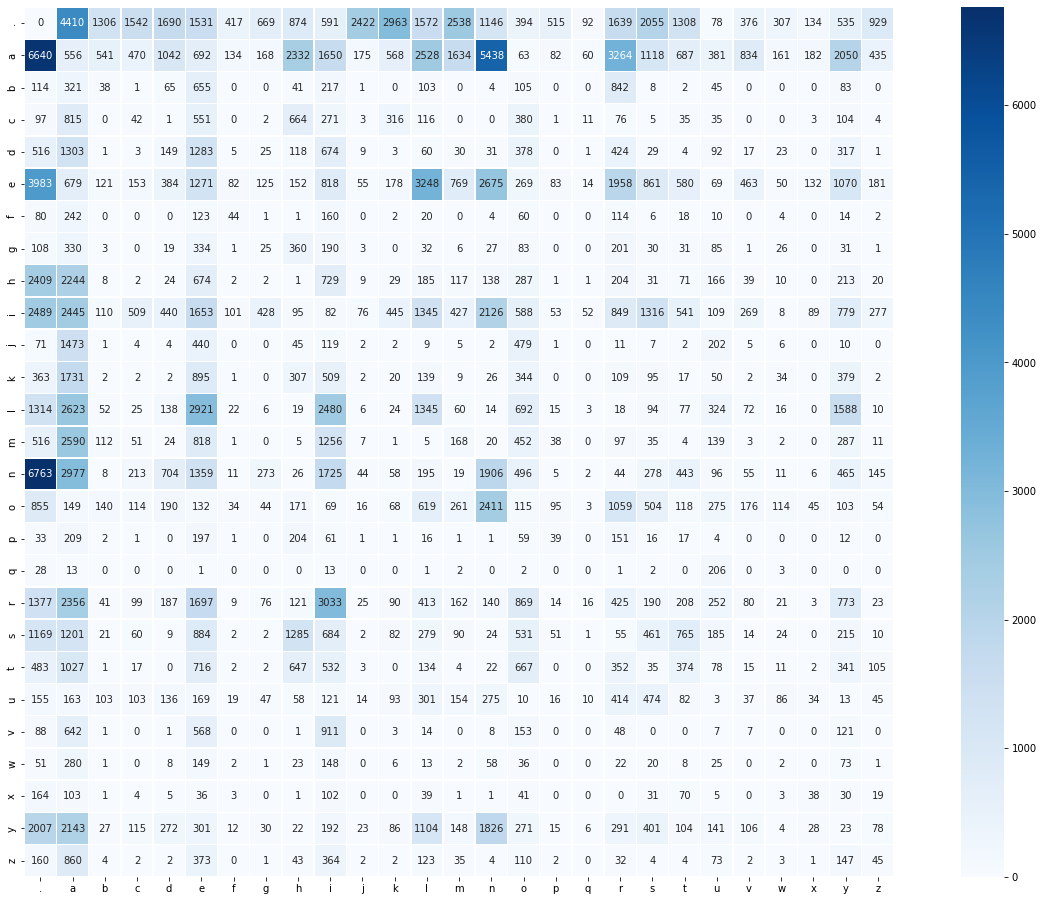

In [ ]:
# Visualize matrix as a heat map using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Let's make this heaptmap a little bit larger than default
fig = plt.figure()
fig.set_size_inches(fig.get_size_inches() * 4)

ax = sns.heatmap(matrix, linewidth=0.5, annot=True, fmt="d", xticklabels=letters, yticklabels=letters, cmap=plt.cm.Blues, square=True)
plt.show()

In [ ]:
# The same heatmap using log scale for better heat visibility
from matplotlib.colors import LogNorm

# Also let's make a function to use it also later on
def print_heatmap(data, fmt="d"):
  fig = plt.figure()
  fig.set_size_inches(fig.get_size_inches() * 4)
  ax = sns.heatmap(data, linewidth=0.5, annot=True, fmt=fmt, xticklabels=letters, yticklabels=letters, norm=LogNorm(), square=True, cmap=plt.cm.Blues)
  plt.show()

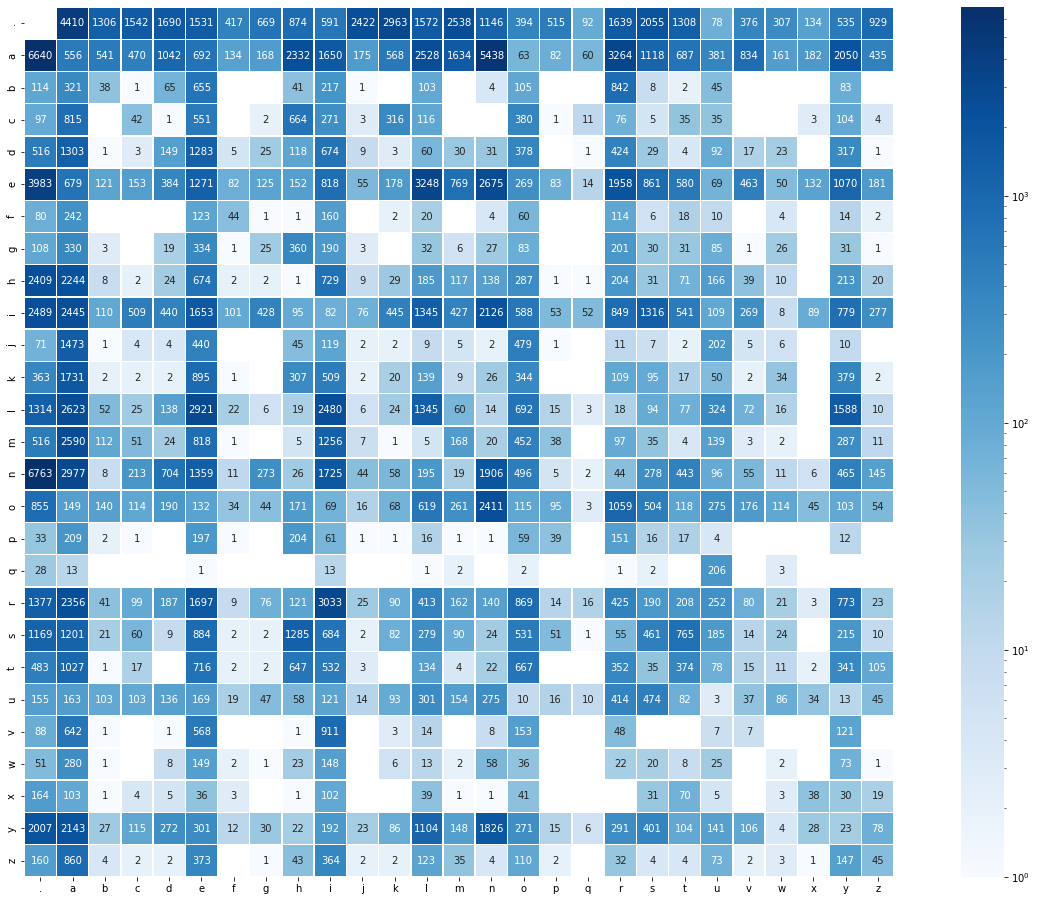

In [ ]:
print_heatmap(matrix)

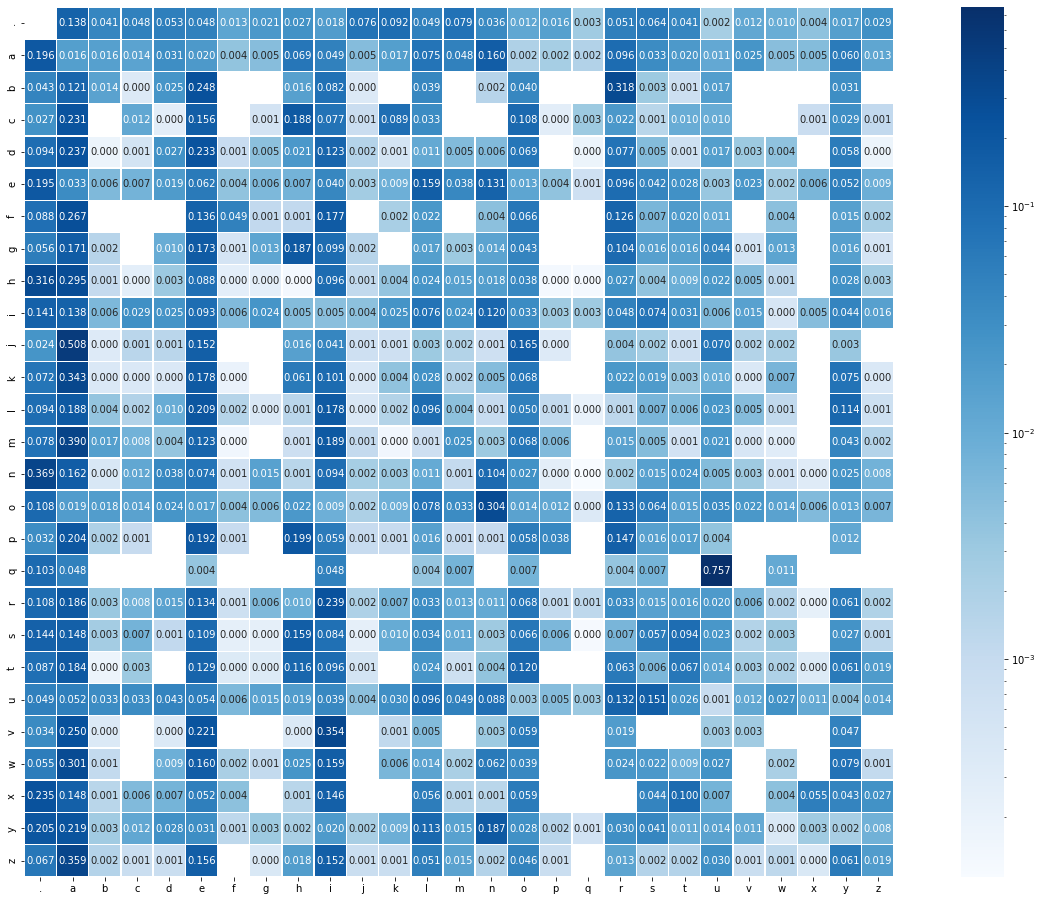

In [ ]:
# Turning frequencies into probability distribution.

# First, create copy of the original matrix of type int16 and change type to float16
from copy import deepcopy
dmatrix = deepcopy(matrix).type(torch.float32)

# Then for each row in a matrix, divide each element by the sum of values in the row
dmatrix = dmatrix / dmatrix.sum(dim=-1).unsqueeze(-1)

print_heatmap(dmatrix, fmt=".3f")

In [ ]:
# To convert from index to letter and back we need two dictionaries
char2idx = { ch:i for i,ch in enumerate(letters) }
idx2char = { i:ch for i,ch in enumerate(letters) }
print(f'Ex: Index for f is {char2idx["f"]}')
print(f'Ex: Character for index 14 is {idx2char[14]}')
print(f'Ex: Character for index 0 is {idx2char[0]}')

Ex: Index for f is 6
Ex: Character for index 14 is n
Ex: Character for index 0 is .


In [ ]:
# Our distribution in each row is multinomial, understood as a generalization 
# of the binomial distribution. So we're going to draw a sample from this
# distribution to get random next character in the sentence

# Let's generate few words
for i in range(50):
  idx = 0  # sentence starts with character '.' at index 0
  gen_word = []
  while True:
    idx = torch.multinomial(dmatrix[idx], num_samples=1, replacement=True).item()
    if idx == 0:
      break
    gen_word.append(idx2char[idx])
  print(''.join(gen_word))

creray
n
khiny
br
sa
qupouri
enueraanaia
n
tonn
pa
minel
jomiyaus
ayush
ah
jud
keloleserta
dittie
lash
ee
el
tiva
eman
kadasaisirtave
zainn
ryad
se
setlleme
eahamayn
ma
carta
sirierminarienaynna
nikaikh
lenicke
mi
rede
sevesh
juscit
ckekh
jali
sheefranzigeniaaklamiemafie
canonion
kassahaselye
neophitzlalubariamak
tra
an
mamin
nah
m
sthanariiyalivoudiy
endonsterinitheve
